# Multicollinearity of Features - Lab

## Introduction

In this lab you'll identify multicollinearity in the Boston Housing Data set.

## Objectives
You will be able to:
* Plot heatmaps for the predictors of the Boston dataset
* Understand and calculate correlation matrices

## Correlation matrix for the Boston Housing data

Let's reimport the Boston Housing data and let's use the data with the categorical variables for `tax_dummy` and `rad_dummy`

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

In [2]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,1,0,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,1,0,0,0,1,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,1,0,0,0,1,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,1,0,0,0,1,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,1,0,0,0,1,0,0,0,0


## Scatter matrix

Create the scatter matrix for the Boston Housing data.

In [3]:
pd.plotting.scatter_matrix(boston_features,figsize  = [10, 10]);

This took a while to load. Not surprisingly, the categorical variables didn't really provide any meaningful result. remove the categorical columns associated with "RAD" and "TAX" from the data again and look at the scatter matrix again.

In [4]:
boston_cont = boston_features.iloc[:,:-9]

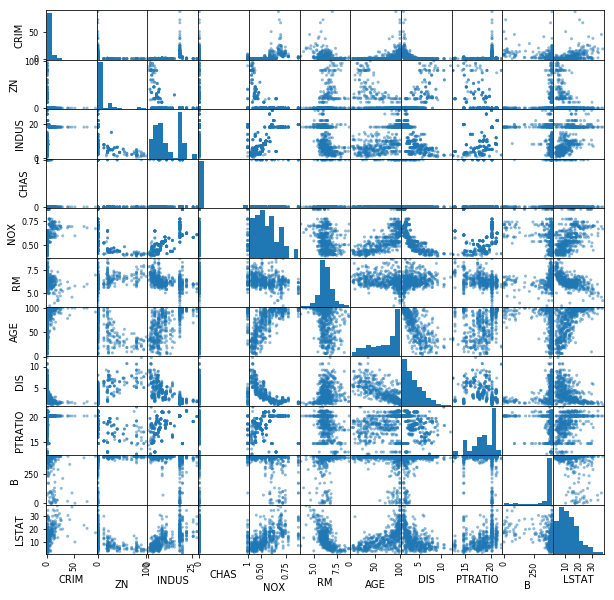

In [5]:
pd.plotting.scatter_matrix(boston_cont,figsize  = [10, 10]);

## Correlation matrix

Next, let's look at the correlation matrix

In [7]:
boston_features.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.289946,-0.385064,0.455621,-0.180924,-0.197472,-0.184650,0.461645,-0.163074,-0.202608,-0.186193,-0.155891,0.612627
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.391679,0.175520,-0.412995,0.225272,0.076190,-0.005934,-0.229186,0.123437,0.140942,0.151576,-0.084612,-0.284384
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.383248,-0.356977,0.603800,-0.323051,-0.030002,-0.108959,0.362516,-0.265447,-0.330365,-0.332186,0.179166,0.644249
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.121515,0.048788,-0.053929,-0.056473,0.007389,0.056601,-0.012195,-0.017537,0.074966,-0.038702,0.008553,-0.027027
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.188933,-0.380051,0.590879,-0.342690,-0.229389,0.075839,0.387153,-0.290176,-0.282659,-0.311681,0.180592,0.600519
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.355501,0.128069,-0.613808,0.163132,-0.113768,0.083847,-0.098933,0.136432,0.168673,0.059543,-0.076881,-0.243649
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.261515,-0.273534,0.602339,-0.246847,-0.144934,0.012508,0.297870,-0.228700,-0.231845,-0.205463,0.126656,0.459175
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.232471,0.291512,-0.496996,0.263248,0.159835,-0.025191,-0.311943,0.203081,0.159853,0.392246,-0.179574,-0.495579
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,1.000000,-0.177383,0.374044,-0.140482,0.165909,-0.478578,0.376461,-0.072776,-0.265111,-0.050772,-0.174969,0.494745
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.177383,1.000000,-0.366087,0.160177,0.150520,0.074438,-0.311795,0.150107,0.194231,0.133179,0.028226,-0.435540


Return "True" for positive or negative correlations that are bigger than 0.75.

In [8]:
abs(boston_features.corr())>.75

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AGE,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
DIS,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
PTRATIO,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
B,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Remove the most problematic feature from the data.

In [ ]:
boston_features = boston_features.drop("NOX",axis=1)

## Summary
Good job! You've now edited the Boston Housing Data so highly correlated variables are removed. 